# Import Libraries

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the Dataset

In [52]:

# Load the dataset
data = pd.read_csv('BeijingPM20100101_20151231.csv')


In [53]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [54]:
# Inspect the data
print(data.head())

   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0


# Select Relevant Features and Target Variable

In [55]:
# Select relevant features and the target variable
features = ['DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']
target = 'pm2.5'

# Handle Missing Values

In [56]:
# Handle missing values
data = data.dropna(subset=[target])
X = data[features]
y = data[target]

In [57]:
X

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,-16,-4.0,1020.0,SE,1.79,0,0
25,-15,-4.0,1020.0,SE,2.68,0,0
26,-11,-5.0,1021.0,SE,3.57,0,0
27,-7,-5.0,1022.0,SE,5.36,1,0
28,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...
43819,-23,-2.0,1034.0,NW,231.97,0,0
43820,-22,-3.0,1034.0,NW,237.78,0,0
43821,-22,-3.0,1034.0,NW,242.70,0,0
43822,-22,-4.0,1034.0,NW,246.72,0,0


In [58]:
y

24       129.0
25       148.0
26       159.0
27       181.0
28       138.0
         ...  
43819      8.0
43820     10.0
43821     10.0
43822      8.0
43823     12.0
Name: pm2.5, Length: 41757, dtype: float64

## Converts categorical variables into dummy/indicator variables (one-hot encoding). The drop_first=True argument avoids multicollinearity by dropping one level of each categorical variable.

In [59]:
# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)


# Split Data into Training and Testing Sets

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Splits the data into training (80%) and testing (20%) sets. random_state=42 ensures reproducibility.

# Polynomial feature transformation

In [61]:
poly = PolynomialFeatures(degree=3)  # Adjust degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
#Transforms the input features into polynomial features of the specified degree. This allows the linear regression model to capture non-linear relationships.


# feature scaling

In [62]:

# Standardize the features
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)


# Model Training

In [63]:

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [64]:

# Make predictions
y_pred = model.predict(X_test_poly)


In [65]:
# Assuming 'single_data' is your single data point stored in a dictionary
single_data = {
    'DEWP': 10,      # Example value for DEWP feature
    'TEMP': 25,      # Example value for TEMP feature
    'PRES': 1010,    # Example value for PRES feature
    'cbwd': 'NW',    # Example value for cbwd feature
    'Iws': 10,       # Example value for Iws feature
    'Is': 0,         # Example value for Is feature
    'Ir': 0          # Example value for Ir feature
}

# Convert the single data point to DataFrame
single_df = pd.DataFrame(single_data, index=[0])

# Apply the same preprocessing steps as done for the training data
single_df = pd.get_dummies(single_df, drop_first=True)  # Convert categorical variables to dummy variables

# Ensure that all expected dummy variable columns are present
# If any dummy variable columns are missing, add them with values set to 0
expected_columns = set(X.columns)
current_columns = set(single_df.columns)
missing_columns = expected_columns - current_columns
for column in missing_columns:
    single_df[column] = 0

# Reorder the columns to match the order used during training
single_df = single_df[X.columns]

# Apply polynomial feature transformation
single_df_poly = poly.transform(single_df)

# Standardize the features
single_df_poly_scaled = scaler.transform(single_df_poly)

# Make prediction for the single data point
prediction = model.predict(single_df_poly_scaled)

print("Prediction:", prediction[0])


Prediction: 27.53040363055183


# Evaluate the model

In [66]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 5751.804573132
R-squared: 0.34723999603858535


# Visualization

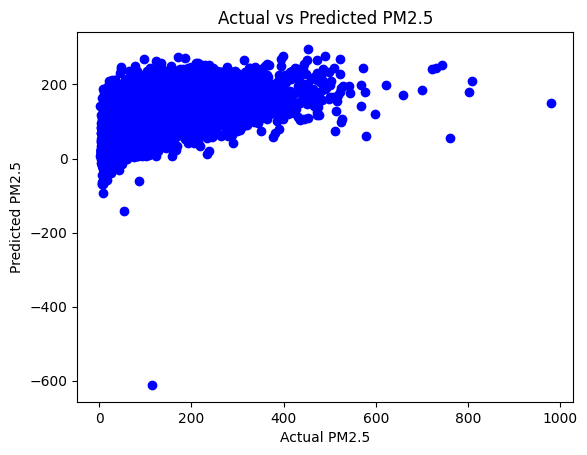

In [67]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.show()
